### Polynomial Regression

In [1]:
# Imports
import numpy as np
import tensorflow as tf

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

/Applications/anaconda/envs/tensorflow/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


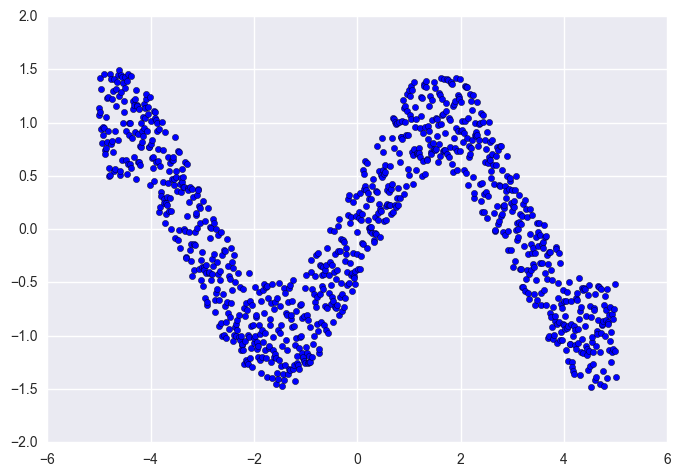

In [2]:
# Create toy data
n_obs = 1000
xs = np.linspace(-5, 5, n_obs)
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_obs)
plt.scatter(xs, ys)

In [3]:
# Placeholders for input and output of the network
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [4]:
# Fitting: Y ~ b + X.W1 + X^2.W2 + X^3.W3 

# Variables for W and b
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for p in range(1, 4):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % p)
    Y_pred = tf.add(tf.mul(tf.pow(X, p), W), Y_pred)

print W
print Y_pred

Tensor("Add_2:0", dtype=float32)


In [5]:
# Calculate average loss
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2))/(n_obs - 1)
print cost

Tensor("div:0", dtype=float32)


In [6]:
# Gradient descent to optimize W, b
l_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate=l_rate).minimize(cost)
print optimizer

name: "GradientDescent"
op: "NoOp"
input: "^GradientDescent/update_bias/ApplyGradientDescent"
input: "^GradientDescent/update_weight_1/ApplyGradientDescent"
input: "^GradientDescent/update_weight_2/ApplyGradientDescent"
input: "^GradientDescent/update_weight_3/ApplyGradientDescent"



38.9865


/Applications/anaconda/envs/tensorflow/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


0.579239
0.426751
0.436088
0.448159
0.455326
0.459164
0.461074
0.462068
0.462491


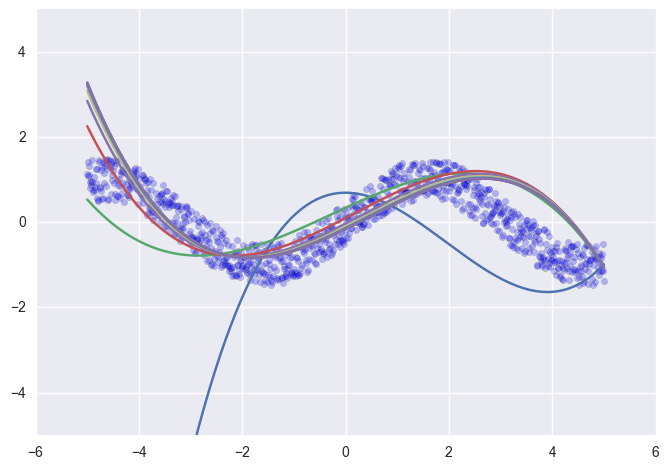

In [7]:
# Create a session to use the graph
n_epoch = 1000

# Plot data
fig, ax = plt.subplots(1, 1)
ax.scatter(xs, ys, alpha=0.25)
ax.set_ylim([-5, 5])

with tf.Session() as ses:
    # Initialize all variables
    ses.run(tf.initialize_all_variables())
    
    # Fit training data
    initial_cost = 0.0
    for epoch in range(n_epoch):
        for (x, y) in zip(xs, ys):
            ses.run(optimizer, feed_dict={X: x, Y: y})
        training_cost = ses.run(cost, feed_dict={X: xs, Y: ys})
        if epoch % 100 == 0:
            print training_cost
            ax.plot(xs, Y_pred.eval(feed_dict={X: xs}, session=ses))
            fig.show() # Display the current figure
            plt.draw() # Re-draw the figure
            
        # Stop if criteria met 
        if np.abs(initial_cost - training_cost) < 1e-6:
            break
        initial_cost = training_cost